
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read student data
df=pd.read_csv('student-data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:
# Calculate number of students
df.shape[0]

395

In [5]:
# Calculate number of features
df.shape[1]

31

In [6]:
# Calculate passing students
df[df['passed']=='yes'].shape[0]

265

In [7]:
# Calculate failing students
df[df['passed']=='no'].shape[0]

130

In [8]:
# Calculate graduation rate
df[df['passed']=='yes'].shape[0]/df.shape[0]

0.6708860759493671

In [9]:
# Print the results
print('number of students is',df.shape[0])
print('number of features is',df.shape[1])
print('number of passing students is',df[df['passed']=='yes'].shape[0])
print('number of failing students is',df[df['passed']=='no'].shape[0])
print('graduation rate  in percentage is',df[df['passed']=='yes'].shape[0]/df.shape[0]*100)

number of students is 395
number of features is 31
number of passing students is 265
number of failing students is 130
graduation rate  in percentage is 67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [10]:
# Extract feature columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [11]:
# Extract target column 'passed'
df['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [12]:
# Separate the data into feature data and target data (X and y, respectively)
x=df.drop(['passed'],axis=1)
y=pd.DataFrame(df['passed'])

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [13]:
x=pd.get_dummies(x)

In [14]:
x.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [15]:
x.shape

(395, 56)

In [16]:
#feature engineering

In [17]:
x.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [18]:
x['Pedu']=x['Medu']+x['Fedu']
x['alc']=x['Dalc']+x['Walc']

In [19]:
x=x.drop(['Medu','Fedu','Dalc','Walc'],axis=1)

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [20]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
# Show the results of the split


In [22]:
x_train.shape

(296, 54)

In [23]:
y_train.shape

(296, 1)

In [24]:
x_test.shape

(99, 54)

In [25]:
y_test.shape

(99, 1)

In [26]:
#standard scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [28]:
#explaination

In [29]:
# Import the three supervised learning models from sklearn

In [30]:
# fit the model-1 on traning data and predict on the test data and measure the accuracy

In [31]:
# 1.logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [33]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

In [34]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes'))
print('f1 is:',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is: 0.7373737373737373
Precision is: 0.7605633802816901
recall is: 0.8571428571428571
f1 is: 0.8059701492537313


In [35]:
confusion_matrix(y_test,y_pred)

array([[19, 17],
       [ 9, 54]], dtype=int64)

In [36]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [37]:
# 2.KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [39]:
acc_values

[0.5454545454545454,
 0.5353535353535354,
 0.6060606060606061,
 0.5555555555555556,
 0.6262626262626263,
 0.5858585858585859,
 0.6262626262626263,
 0.6262626262626263,
 0.6363636363636364,
 0.6565656565656566,
 0.6464646464646465,
 0.6464646464646465]

Text(0, 0.5, 'accuracy')

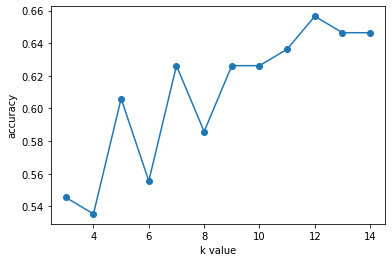

In [40]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [42]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes'))
print('f1 is:',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is: 0.6060606060606061
Precision is: 0.6463414634146342
recall is: 0.8412698412698413
f1 is: 0.7310344827586207


In [43]:
confusion_matrix(y_test,y_pred)

array([[ 7, 29],
       [10, 53]], dtype=int64)

In [44]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [45]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [46]:
# 3.Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_model = DecisionTreeClassifier()

In [49]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt_model.predict(x_test)

In [51]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes'))
print('f1 score is:',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is: 0.5959595959595959
Precision is: 0.676923076923077
recall is: 0.6984126984126984
f1 score is: 0.6875


In [52]:
y_test.value_counts()

passed
yes       63
no        36
dtype: int64

In [53]:
confusion_matrix(y_test,y_pred)

array([[15, 21],
       [19, 44]], dtype=int64)

In [54]:
# fit the model-4 on traning data and predict on the test data and measure the accuracy

In [55]:
# 4.random forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [57]:
from sklearn.metrics import f1_score,confusion_matrix

In [58]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes'))
print('f1 score is:',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is: 0.6666666666666666
Precision is: 0.6666666666666666
recall is: 0.9523809523809523
f1 score is: 0.7843137254901961


In [59]:
confusion_matrix(y_test,y_pred)

array([[ 6, 30],
       [ 3, 60]], dtype=int64)